In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt 

In [16]:
df = pd.read_csv("../data/Advertising_Data.csv")
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [17]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [19]:
# Find the advertising channel with the highest spend for each record
df['Max_Spend_Channel'] = df.iloc[:, :-1].idxmax(axis=1)

df

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold,Max_Spend_Channel
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0,Affiliate_Marketing
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0,Influencer_Marketing
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0,Google_Ads
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0,TV
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0,Affiliate_Marketing
...,...,...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56,6851.0,TV
296,512.38,250.83,373.78,366.95,987.14,509.03,6477.0,Influencer_Marketing
297,998.10,858.75,781.06,60.61,174.63,213.53,6949.0,TV
298,322.35,681.22,640.29,343.65,534.22,648.71,7737.0,Billboards


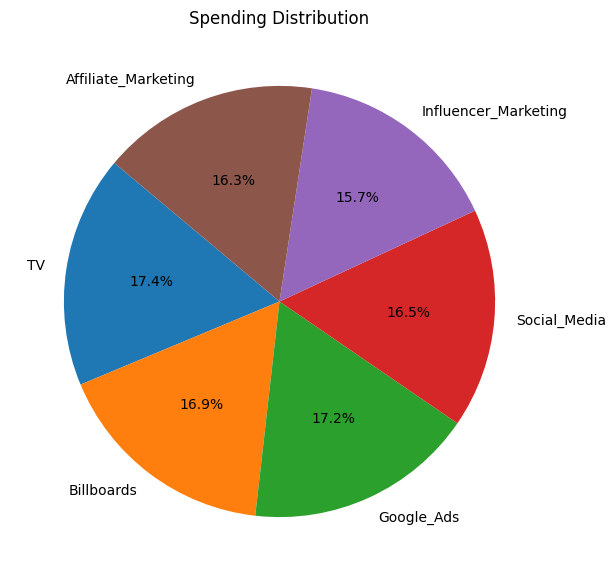

In [21]:
## visualizing spending distributions

# Sum the values for each column (excluding the last one)
sums = df.iloc[:, :-2].sum()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Spending Distribution')
plt.show()

In [6]:
# isolating subsets of the data based on the max spend channel
max_spend_channels = df['Max_Spend_Channel'].unique() 
subsets_dict = {}

for channel in max_spend_channels:
    subsets_dict[channel] = df[df['Max_Spend_Channel'] == channel]
    
subsets_dict.keys() 


dict_keys(['Affiliate_Marketing', 'Influencer_Marketing', 'Google_Ads', 'TV', 'Billboards', 'Social_Media'])

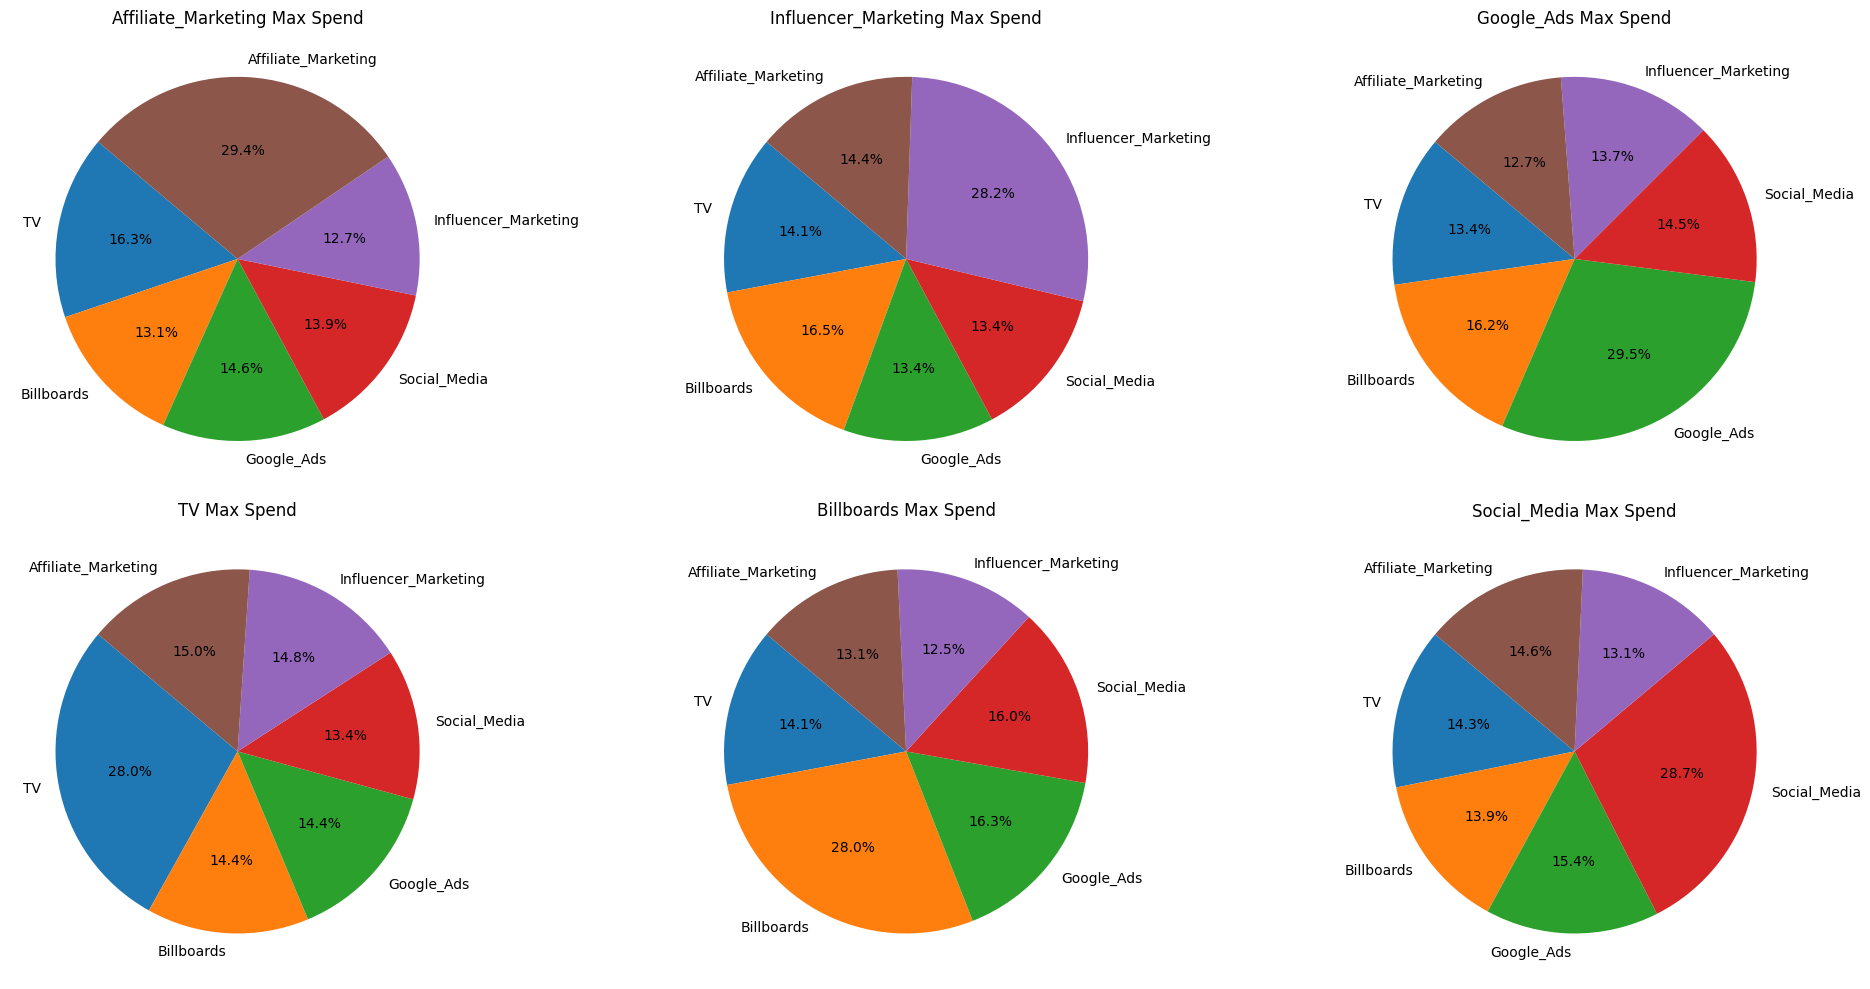

In [7]:
# Plotting pie charts for each subset
num_channels = len(subsets_dict)
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

for ax, (channel, subset_df) in zip(axes.flatten(), subsets_dict.items()):
    sums = subset_df.iloc[:, :-2].sum()  # Exclude 'Product_Sold' and 'Max_Spend_Channel'
    ax.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{channel} Max Spend')

# Hide any unused subplots
for ax in axes.flatten()[num_channels:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

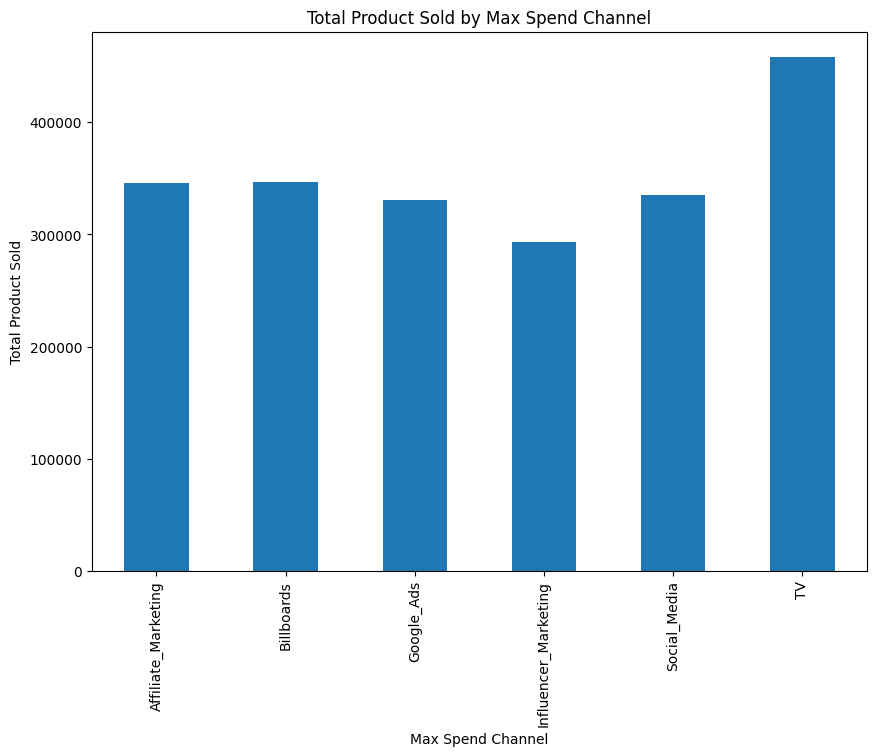

In [8]:
# Create a bar chart showing total products sold for each subset
plt.figure(figsize=(10, 7))
df.groupby('Max_Spend_Channel')['Product_Sold'].sum().plot(kind='bar')
plt.xlabel('Max Spend Channel')
plt.ylabel('Total Product Sold')
plt.title('Total Product Sold by Max Spend Channel')
plt.show()

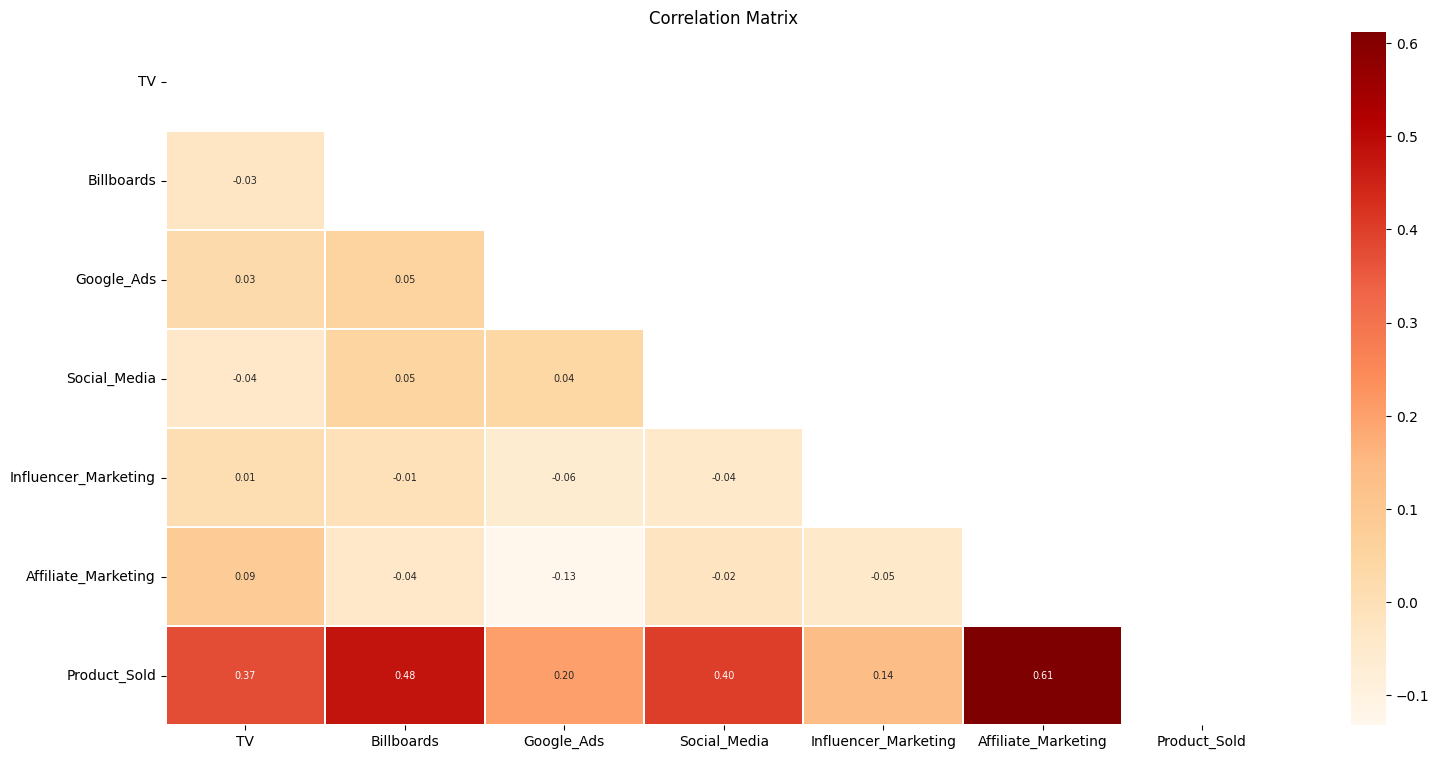

In [12]:
def plot_corr_heatmap(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    corr= numeric_data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    plt.figure(figsize=(18, 9))
    sns.heatmap(corr, cmap="OrRd", annot=True, fmt=".2f", linewidths=.33, annot_kws={"fontsize": "x-small"}, mask=mask)
    plt.title("Correlation Matrix")
    

# corr_train = train.copy()
# we must encode the categorical features for plotting
# corr_train[cat_features + [target]] = corr_train[cat_features + [target]].apply(lambda x: x.astype('category').cat.codes)
  
plot_corr_heatmap(df)